In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/FP
!ls

/content/drive/MyDrive/Colab Notebooks/FP
Mall_Customers.csv  Untitled.ipynb


In [3]:
pip install kneed

In [4]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly as py
from kneed import KneeLocator
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,normalize
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Mall_Customers.csv')

In [6]:
print(dataset.shape)

(200, 5)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df_new = dataset.drop(['CustomerID'], axis = 1)
df_new['Gender'].replace(['Male', 'Female'],[1, 0], inplace=True)
df_new

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [10]:
set_option('display.precision', 3)
print(df_new.describe())

        Gender      Age  Annual Income (k$)  Spending Score (1-100)
count  200.000  200.000             200.000                 200.000
mean     0.440   38.850              60.560                  50.200
std      0.498   13.969              26.265                  25.824
min      0.000   18.000              15.000                   1.000
25%      0.000   28.750              41.500                  34.750
50%      0.000   36.000              61.500                  50.000
75%      1.000   49.000              78.000                  73.000
max      1.000   70.000             137.000                  99.000


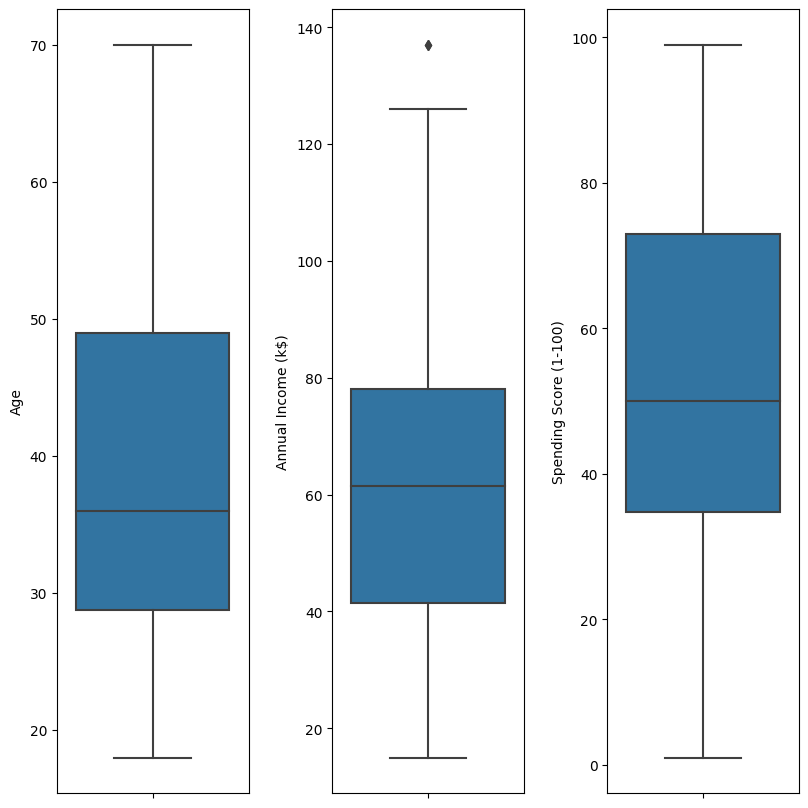

In [11]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(8, 8))
index = 0
axs = axs.flatten()
for k in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=2, h_pad=1)

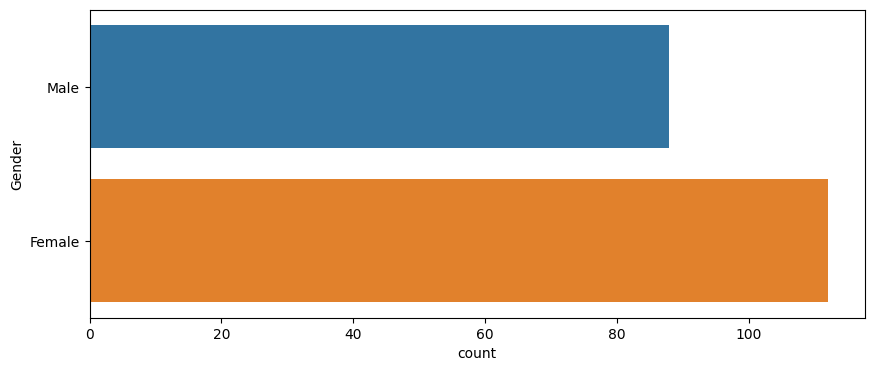

In [12]:
plt.figure(1, figsize = (10, 4))
sns.countplot(y = "Gender", data = dataset)
plt.show()

In [13]:
for k, v in (df_new.drop(['Gender'], axis = 1)).items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df_new)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 0.00%
Column Annual Income (k$) outliers = 1.00%
Column Spending Score (1-100) outliers = 0.00%


In [14]:
df_new

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [15]:
# scaler = StandardScaler()
# df = scaler.fit_transform(df_new)

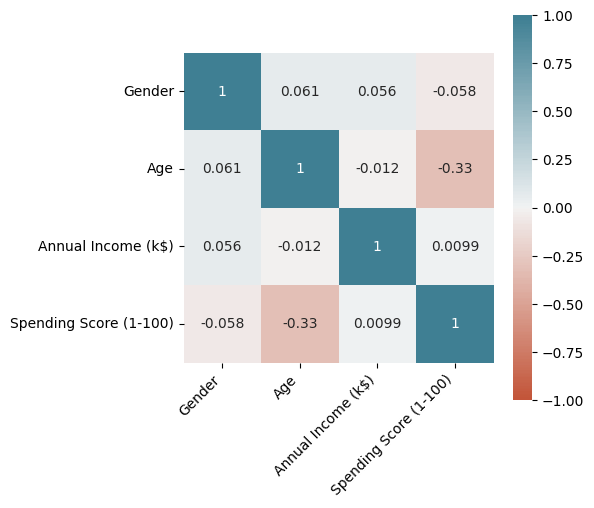

In [16]:
pd.set_option('display.precision', 2)
cor = df_new.corr(method='pearson')


fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(
    cor,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There is no high correlation between features.

In [17]:
# min_max_scaler = preprocessing.MinMaxScaler()
# column_sels = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
# x = df_new.loc[:,column_sels]
# #y = dataset['quality']
# df = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

In [18]:
# df

In [19]:
for k, v in (df_new.drop(['Gender'], axis = 1)).items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df_new)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 0.00%
Column Annual Income (k$) outliers = 1.00%
Column Spending Score (1-100) outliers = 0.00%


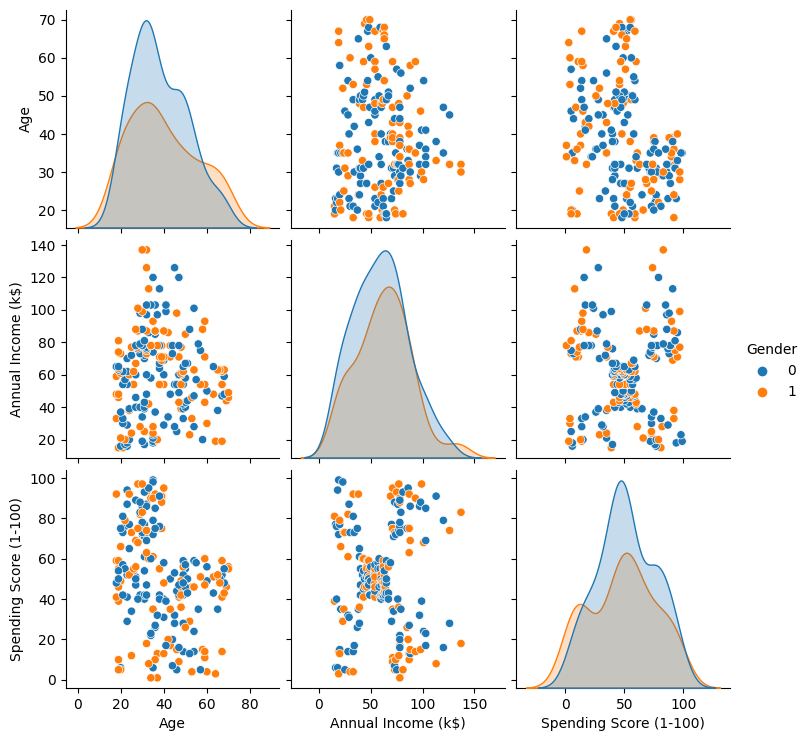

In [20]:
sns.pairplot(df_new, hue= 'Gender')

In [21]:
# dfnormalized = pd.DataFrame(normalize(df,axis=0), columns=df.columns)
# dfnormalized

In [22]:
# pd.set_option('display.precision', 2)
# cor = dfnormalized.corr(method='pearson')

# # select features that have high absolute correlation with output.
# fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
# sns.heatmap(
#     cor,
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True,
#     ax=ax,
#     annot=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

<ipython-input-23-47d5a69ee693>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], bins = 20)
<ipython-input-23-47d5a69ee693>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], bins = 20)
<ipython-input-23-47d5a69ee693>:8: UserWarning: 

`distplot` is a deprecated function and 

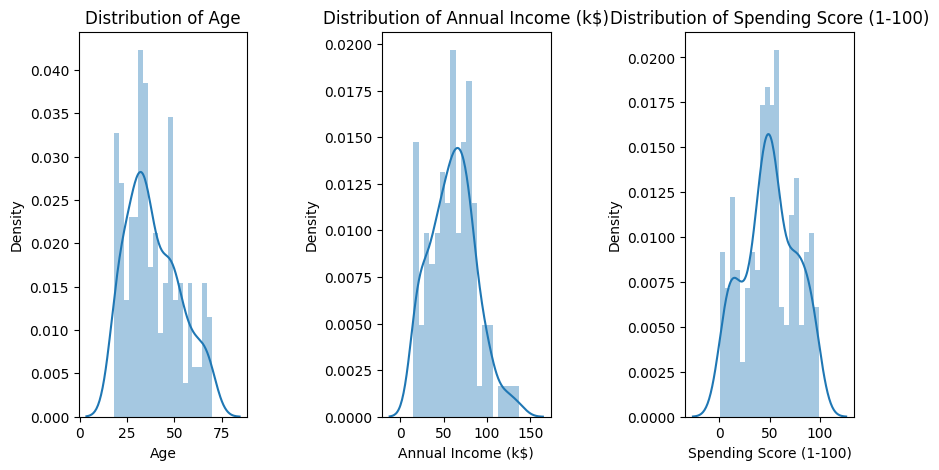

In [23]:
plt.figure(1, figsize=(10, 5))
n = 0

for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 2, wspace = 0.8)
    sns.distplot(df_new[i], bins = 20)
    plt.title("Distribution of {}".format(i))
plt.show()

In [24]:
# plt.figure(1, figsize=(10, 5))
# n = 0

# for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
#     n += 1
#     plt.subplot(1, 3, n)
#     plt.subplots_adjust(hspace = 2, wspace = 0.8)
#     sns.distplot(dfnormalized[i], bins = 20)
#     plt.title("Distribution of {}".format(i))
# plt.show()

In [25]:
# df

In [26]:
# dfnormalized.describe()

### Chose number of cluster base on Elbow method

In [27]:
X = df_new[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 42  , algorithm='lloyd') )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

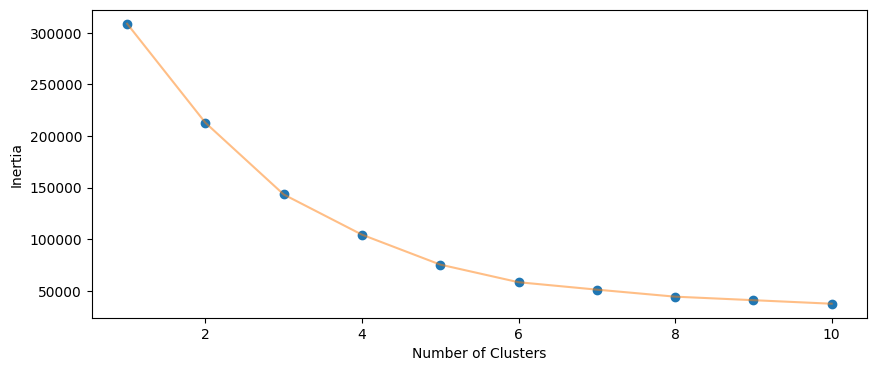

In [28]:
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [29]:
kl = KneeLocator( range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

4

In [30]:
kmeans = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 42  , algorithm='lloyd') )
y_clusters = kmeans.fit_predict(X)
label = kmeans.labels_
centroid = kmeans.cluster_centers_

In [1]:
# y_clusters-label

In [32]:
print(centroid)

[[40.39473684 87.         18.63157895]
 [44.89473684 48.70526316 42.63157895]
 [24.82142857 28.71428571 74.25      ]
 [32.69230769 86.53846154 82.12820513]]


In [33]:
# df['label'] =  label
# trace = go.Scatter3d(x= df['Age'], z= df['Spending Score (1-100)'], y= df['Annual Income (k$)'], mode='markers', marker=dict( color = df['label'], size= 5, line=dict( color= df['label'], width= 12), opacity=0.5))
# data = [trace]
# layout = go.Layout(title= 'Clusters', scene = dict( xaxis = dict(title  = 'Age'), zaxis = dict(title  = 'Spending Score'), yaxis = dict(title  = 'Annual Income')))
# fig = go.Figure(data=data, layout=layout)
# py.offline.iplot(fig)

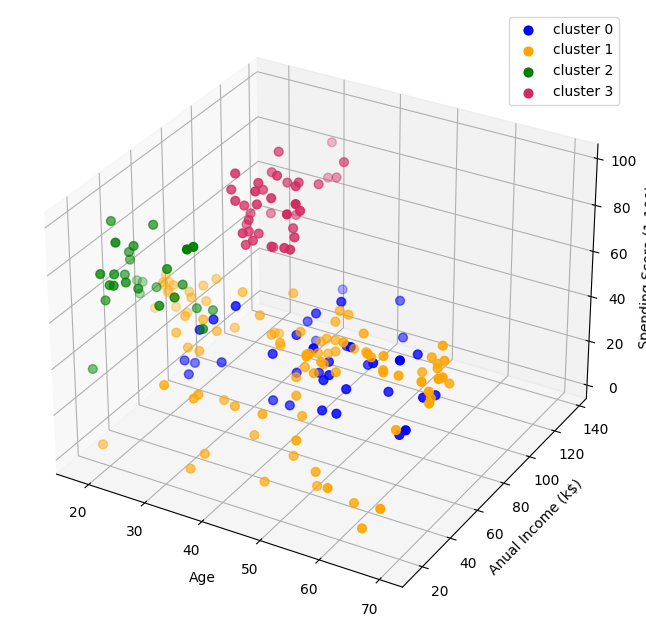

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")

ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()